In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sb
from statsmodels.iolib.summary2 import summary_col

In [2]:
df1 = pd.read_stata('CollegeDistance.dta')
df1.head()

,female,black,hispanic,bytest,dadcoll,momcoll,ownhome,urban,cue80,stwmfg80,dist,tuition,incomehi,ed
0,0.0,0.0,0.0,39.150002,1.0,0.0,1.0,1.0,6.2,8.09,0.2,0.88915,1.0,12.0
1,1.0,0.0,0.0,48.869999,0.0,0.0,1.0,1.0,6.2,8.09,0.2,0.88915,0.0,12.0
2,0.0,0.0,0.0,48.740002,0.0,0.0,1.0,1.0,6.2,8.09,0.2,0.88915,0.0,12.0
3,0.0,1.0,0.0,40.400002,0.0,0.0,1.0,1.0,6.2,8.09,0.2,0.88915,0.0,12.0
4,1.0,0.0,0.0,40.480000,0.0,0.0,0.0,1.0,5.6,8.09,0.4,0.88915,0.0,13.0


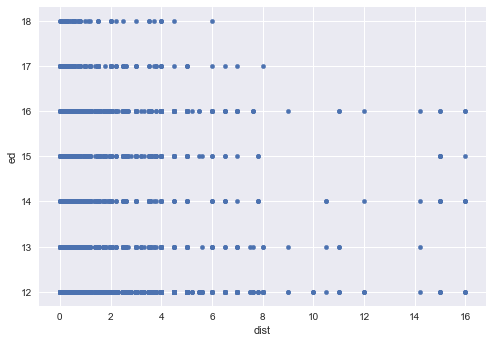

In [3]:
plt.style.use('seaborn')
df1.plot(x='dist', y='ed', kind='scatter')
plt.show()

In [4]:
df1['const'] = 1
reg1 = sm.OLS(endog=df1['ed'], exog=df1[['const', 'dist', 'female', 'bytest', 'tuition', 'black', 'hispanic', 'incomehi', 'ownhome', 'dadcoll', 'momcoll', 'cue80', 'stwmfg80']])

results1 = reg1.fit()

print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                     ed   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     124.8
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          3.85e-263
Time:                        22:57:32   Log-Likelihood:                -7013.3
No. Observations:                3796   AIC:                         1.405e+04
Df Residuals:                    3783   BIC:                         1.413e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9208      0.252     35.458      0.0

a. If Dist increases from 2 to 3, years of education decreases 0.0367 years. The years of education is expected to increase 0.0367 years if Dist increases from 6 to 7.

In [5]:
df1['log_ed'] = np.log(df1['ed'])
reg2 = sm.OLS(endog=df1['log_ed'], exog=df1[['const', 'dist', 'female', 'bytest', 'tuition', 'black', 'hispanic', 'incomehi', 'ownhome', 'dadcoll', 'momcoll', 'cue80', 'stwmfg80']])

results2 = reg2.fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                 log_ed   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     125.9
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          4.44e-265
Time:                        22:57:32   Log-Likelihood:                 3027.6
No. Observations:                3796   AIC:                            -6029.
Df Residuals:                    3783   BIC:                            -5948.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2658      0.018    126.854      0.0

b. If Dist increases from 2 to 3, 0.0026 years of education is expected to decrease. If Dist increases from 6 to 7, 0.0026 years of education is expected to increase.

In [6]:
df1['sq_dist'] = df1["dist"]**2
reg3 = sm.OLS(endog=df1['ed'], exog=df1[['const', 'dist', 'sq_dist', 'female', 'bytest', 'tuition', 'black', 'hispanic', 'incomehi', 'ownhome', 'dadcoll', 'momcoll', 'cue80', 'stwmfg80']])

results3 = reg3.fit()

print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                     ed   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     115.6
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          5.95e-263
Time:                        22:57:32   Log-Likelihood:                -7011.3
No. Observations:                3796   AIC:                         1.405e+04
Df Residuals:                    3782   BIC:                         1.414e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0122      0.256     35.264      0.0

c. If Dist increases from 2 to 3, 0.0582 years of education is expected to decrease. 
change in ed = (3* - 0.0812 + 9*0.0046) - (2* - 0.0812 + 4*0.0046) = -0.0812 + 5*0.0046 = -0.0582

If Dist increases from 6 to 7, 0.0214 years of education is expected to decrease.
change in ed = (7* - 0.0812 + 49*0.0046) - (6* - 0.0812 + 36*0.0046) = -0.0812 + 13*0.0046 = -0.0214

d. I prefer the regression in c because the model specification is more detailed. We're able to see more concrete relationship between distance from school and years of education.

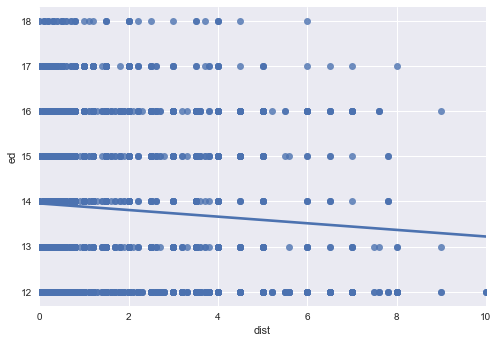

In [7]:
a_plot = sb.regplot(x = "dist",
            y = "ed", 
            ci = None,
            data = df1)

a_plot.set(xlim=(0, 10))

plt.show()

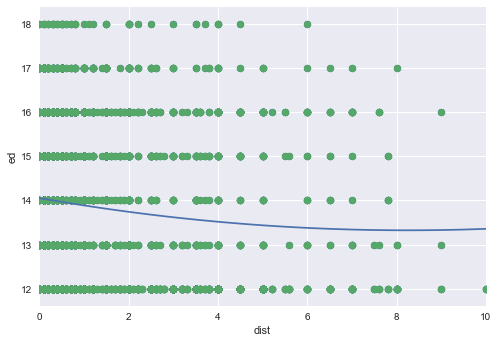

In [8]:
x = df1['dist']
y = df1['ed']

plt.scatter(x,y)
plt.xlim(0, 10)
plt.xlabel("dist")
plt.ylabel("ed")

model = np.poly1d(np.polyfit(x, y, 2))

polyline = np.linspace(0, 10)
plt.scatter(x, y)
plt.plot(polyline, model(polyline))
plt.show()

In [9]:
sum(i > 10 for i in df1['dist'])

44

e. i. Both the linear regression function and the quadratic function are downwards sloped. More distance leads to less education. The quadratic function's negative effect from distance is gradual. The negative effect is large when distance is small in this function whereas the linear function has linear relationship. The answers would not change if I plotted the regression function for a white male with the same characterisrics. This is because we're holding other variables constant.

ii. Distance has positive effect on education for dist>10 for the (c) function. More education the further you're from school. There are 44 observations with Dist >10

In [11]:
df1['dadcoll_momcoll'] = df1["dadcoll"]*df1["momcoll"]

reg4 = sm.OLS(endog=df1['ed'], exog=df1[['const', 'dist', 'sq_dist', 'female', 'bytest', 'tuition', 'black', 'hispanic', 'incomehi', 'ownhome', 'dadcoll', 'momcoll', 'dadcoll_momcoll', 'cue80', 'stwmfg80']])

results4 = reg4.fit()

print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                     ed   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     107.8
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          5.05e-263
Time:                        22:57:38   Log-Likelihood:                -7008.7
No. Observations:                3796   AIC:                         1.405e+04
Df Residuals:                    3781   BIC:                         1.414e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.0020      0.255     

f. The coefficient on the interaction term measures the joint effect of mom and dad's college graduate on education level. Both parents graduating from college is correlated with 0.3665 less years of education.

g. i. momcoll, dadcoll, and dadcoll_momcoll has zero effect on Mary's education.
dadcoll has effect on Jane's education positively of 0.6538 years.
Thus, Jane is predicted to be 0.6538 years more educated Mary.

ii. momcoll has effect on Alexis's education positively of 0.5694 years.
Alexis is predicted to be 0.5694 years more educated than Mary.

iii. momcoll, dadcoll, and dadcoll_momcoll has effect on Bonie collectively of 0.8567 years.
Bonie is predicted to be 0.5694 years more educated than Mary.

h. Yes, family income over 
25,000 is associated with 0.3623 more education compared to family income less than $25,000.

i. In summary, distance has slightly negative effect on years of education. It is hard to say distance has a causal effect on students' education level. students who live far have less years of education but this is probably not because they don't want to go to school because it is far away. One possible explanation is less education in rural areas where people are less densley populated. (which is hard to say causal relationship)